In [423]:
# import necessary libraries - (CELL 1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

In [424]:
# read in the dataset - (CELL 2)
data = pd.read_csv("Surveys_cleaned.csv", sep=',')

In [425]:
# see what the data looks like - (CELL 3)
display(data.head())
print(data.shape)

,datetime,age_band,industry,job_title,salary,compensation,currency,country,state,overall_experience_band,field_experience_band,education,gender
0,2021-04-27 11:02:10,25-34,Education (Higher Education),research and instruction librarian,55000,0,USD,united states of america,Massachusetts,5-7 years,5-7 years,Master's degree,Woman
1,2021-04-27 11:02:22,25-34,Computing or Tech,change & internal communications manager,54600,4000,GBP,united kingdom,Not American,8-10 years,5-7 years,College degree,Non-binary
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,34000,0,USD,united states of america,Tennessee,2-4 years,2-4 years,College degree,Woman
3,2021-04-27 11:02:41,25-34,Nonprofits,program manager,62000,3000,USD,united states of america,Wisconsin,8-10 years,5-7 years,College degree,Woman
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,60000,7000,USD,united states of america,South Carolina,8-10 years,5-7 years,College degree,Woman


(27090, 13)


In [ ]:
# CELL 4

# Data cleansing and preparation

In [426]:
# get currency types - (CELL 5)
currencies = list(data['currency'].unique())
print(currencies)

['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'CHF', 'ZAR', 'SEK', 'JPY']


In [427]:
# conversion rate of currencies to USD on 2023 january 25 13:00 UTC - (CELL 6)
currency_to_USD = {
    'USD': 1.0000,
    'GBP': 1.2300,
    'CAD': 0.7500,
    'EUR': 1.0900,
    'AUD/NZD': 0.6800,
    'CHF': 1.0900,
    'ZAR': 0.0580,
    'SEK': 0.9800,
    'JPY': 0.0077
}

# replace currency with the conversion rates
data['currency'] = data['currency'].replace(currency_to_USD)

# check if replacement worked
print(data['currency'].value_counts())

1.0000    22763
0.7500     1641
1.2300     1552
1.0900      608
0.6800      489
0.0077       22
0.0580       13
0.9800        2
Name: currency, dtype: int64


In [428]:
# calculate salary and compensation to USD - (CELL 7)
data['salary'] = (data['salary'] * data['currency']).round(0).astype(int)
data['compensation'] = (data['compensation'] * data['currency']).round(0).astype(int)

In [429]:
# drop unnecessary columns for further transformation - (CELL 8)
data = data.drop('currency', axis='columns')
data = data.drop('datetime', axis='columns')
data = data.drop('job_title', axis='columns')
data = data.drop('state', axis='columns')

In [430]:
# assign correct dtypes - (CELL 9)
data['age_band'] = data['age_band'].astype('category')
data['industry'] = data['industry'].astype('category')
data['country'] = data['country'].astype('category')
data['overall_experience_band'] = data['overall_experience_band'].astype('category')
data['field_experience_band'] = data['field_experience_band'].astype('category')
data['education'] = data['education'].astype('category')
data['gender'] = data['gender'].astype('category')

# check dtypes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27090 entries, 0 to 27089
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_band                 27090 non-null  category
 1   industry                 27090 non-null  category
 2   salary                   27090 non-null  int64   
 3   compensation             27090 non-null  int64   
 4   country                  27090 non-null  category
 5   overall_experience_band  27090 non-null  category
 6   field_experience_band    27090 non-null  category
 7   education                27090 non-null  category
 8   gender                   27090 non-null  category
dtypes: category(7), int64(2)
memory usage: 612.0 KB
None


In [431]:
# CELL 10
display(data.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman


In [ ]:
# CELL 11

# Data exploration an visualization

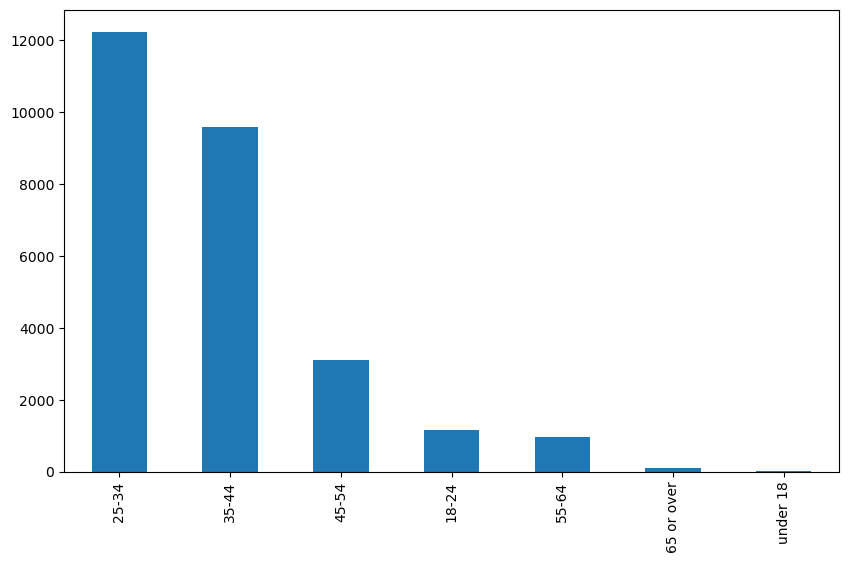

In [432]:
# show distribution of age band - (CELL 12)
data['age_band'].value_counts().plot(kind='bar')
plt.show()

In [433]:
# labelencode mapping - (CELL 13)
encoded_age_band = {
    'under 18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65 or over': 6,
}

In [434]:
# labelencode age band (ordinal variable) - (CELL 14)
data['age_band_le'] = data['age_band']
data['age_band_le'] = data['age_band_le'].replace(encoded_age_band)
display(data.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender,age_band_le
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman,2
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary,2
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman,2
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman,2
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman,2


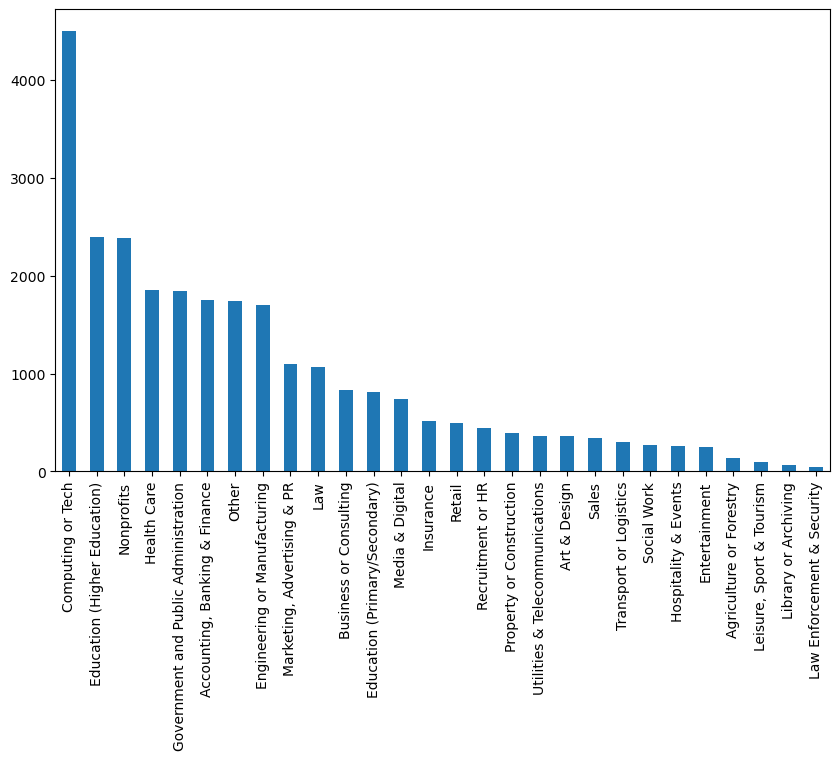

In [435]:
# show distribution of industry - (CELL 15)
data['industry'].value_counts().plot(kind='bar')
plt.show()

In [436]:
# create dummies for industry (nominal variable) - (CELL 16)
industry_dummies = pd.get_dummies(data['industry'] )

In [437]:
# drop 1 dummy variable to prevent dummy variable trap (https://www.learndatasci.com/glossary/dummy-variable-trap/) - (CELL 17)
industry_dummies = industry_dummies.drop('Media & Digital', axis='columns')

In [438]:
# show dummies - (CELL 18)
display(industry_dummies.head())

,"Accounting, Banking & Finance",Agriculture or Forestry,Art & Design,Business or Consulting,Computing or Tech,Education (Higher Education),Education (Primary/Secondary),Engineering or Manufacturing,Entertainment,Government and Public Administration,...,"Marketing, Advertising & PR",Nonprofits,Other,Property or Construction,Recruitment or HR,Retail,Sales,Social Work,Transport or Logistics,Utilities & Telecommunications
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


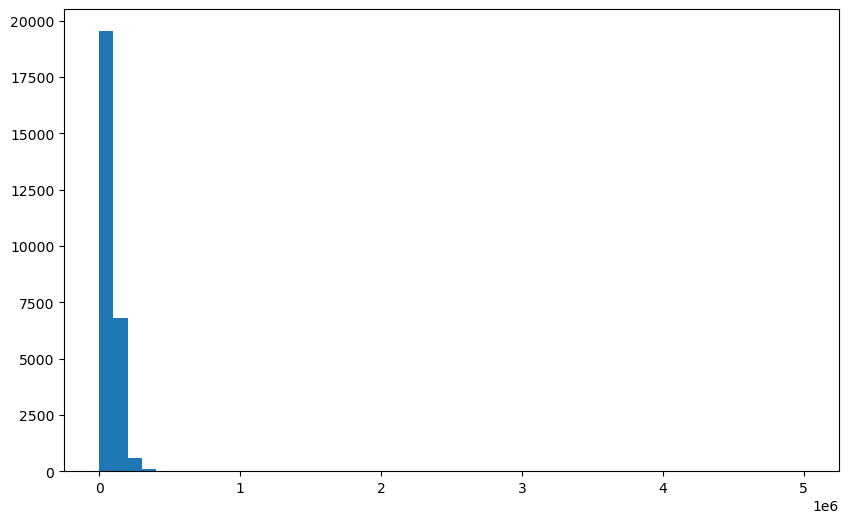

In [439]:
# show salary distribution - (CELL 19)
salaries = np.array(data['salary'])
plt.hist(salaries, bins=50)
plt.show()

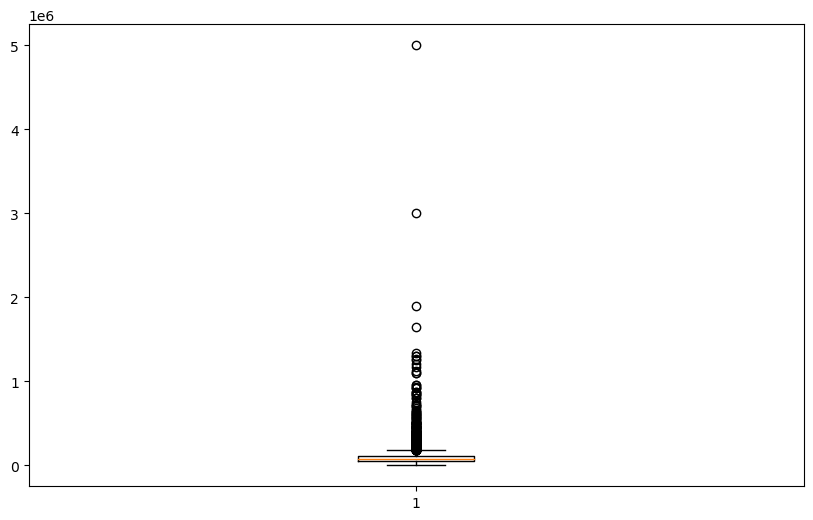

In [440]:
# visualize salary outliers - (CELL 20)
plt.boxplot(salaries)
plt.show()

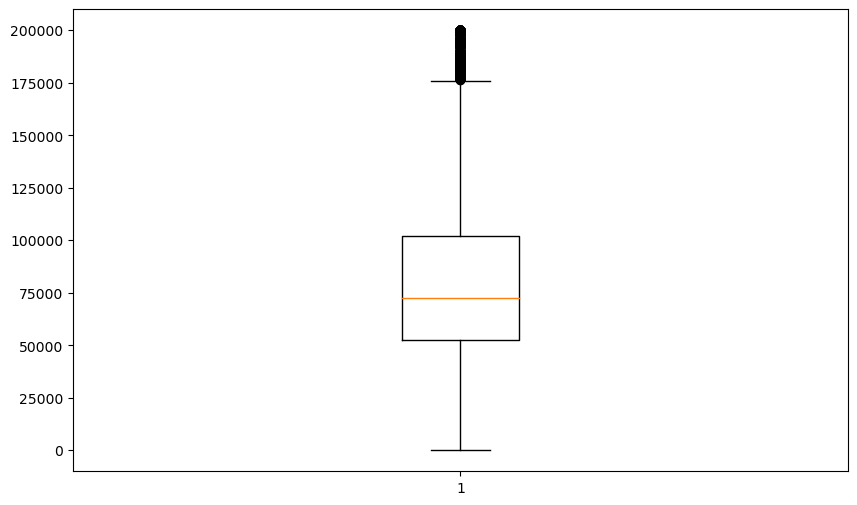

In [441]:
# visualize with outlier salaries below certain amount - (CELL 21)
salary_threshold = 200000
plt.boxplot(salaries[salaries <= salary_threshold])
plt.show()

In [442]:
# projection of how many rows will be lost - (CELL 22)
current_rows = data.shape[0]
new_rows = data[data['salary'] <= salary_threshold].shape[0]
lost_perc = abs(round(((new_rows - current_rows) / current_rows) * 100, 1))

print(f"current row amount: {current_rows}")
print(f"remaining row amount after removal: {new_rows}")
print(f"rows percentage lost: {lost_perc}%")

current row amount: 27090
remaining row amount after removal: 26327
rows percentage lost: 2.8%


In [443]:
# remove outliers with salary above threshold - (CELL 23)
salary_outlier_filter = data['salary'] > salary_threshold
data = data[~salary_outlier_filter]

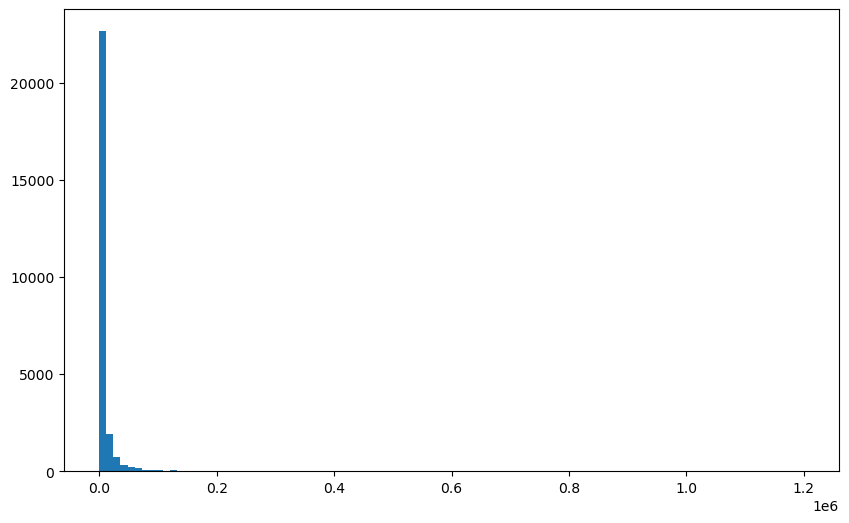

In [444]:
# show compensation distribution - (CELL 24)
compensations = np.array(data['compensation'])
plt.hist(compensations, bins=100)
plt.show()

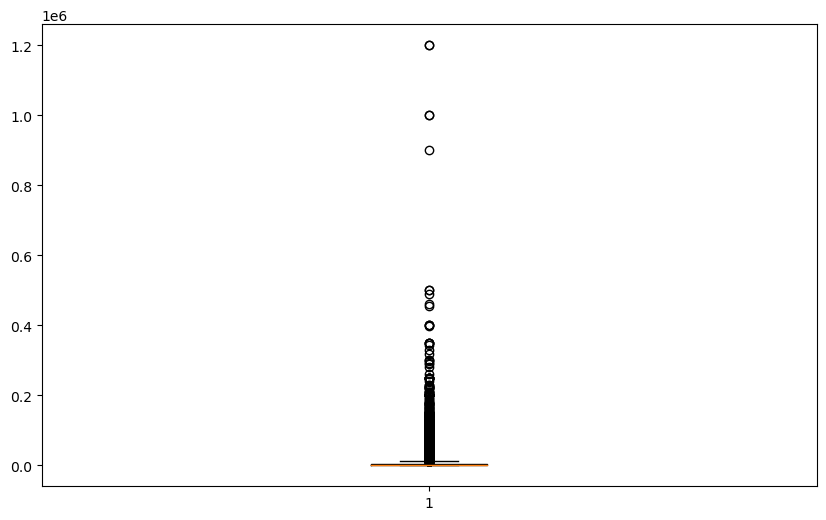

In [445]:
# visualize compensation outliers - (CELL 25)
plt.boxplot(compensations)
plt.show()

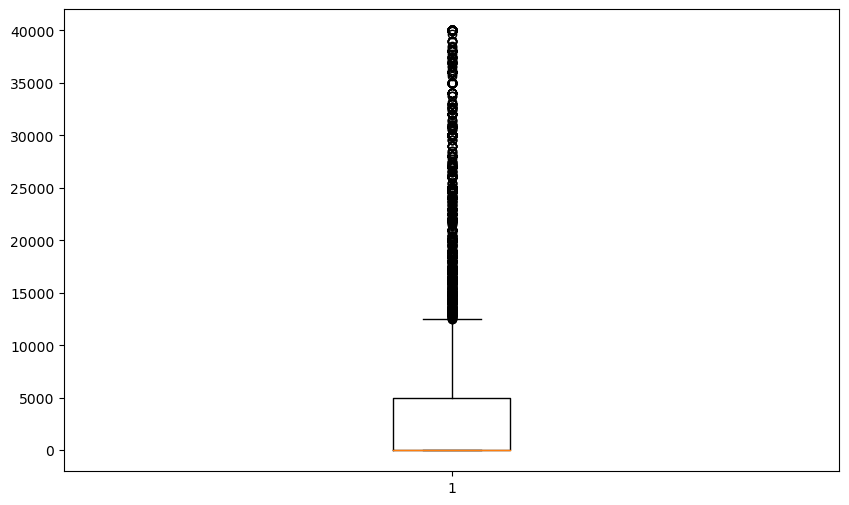

In [446]:
# visualize with outlier compensations below certain amount - (CELL 26)
compensation_threshold = 40000
plt.boxplot(compensations[compensations <= compensation_threshold])
plt.show()

In [447]:
# projection of how many rows will be lost - (CELL 27)
current_rows = data.shape[0]
new_rows = data[data['compensation'] <= compensation_threshold].shape[0]
lost_perc = abs(round(((new_rows - current_rows) / current_rows) * 100, 1))

print(f"current row amount: {current_rows}")
print(f"remaining row amount after removal: {new_rows}")
print(f"rows percentage lost: {lost_perc}%")

current row amount: 26327
remaining row amount after removal: 25508
rows percentage lost: 3.1%


In [448]:
# remove outliers with compensation above threshold - (CELL 28)
comp_outlier_filter = data['compensation'] > compensation_threshold
data = data[~comp_outlier_filter]

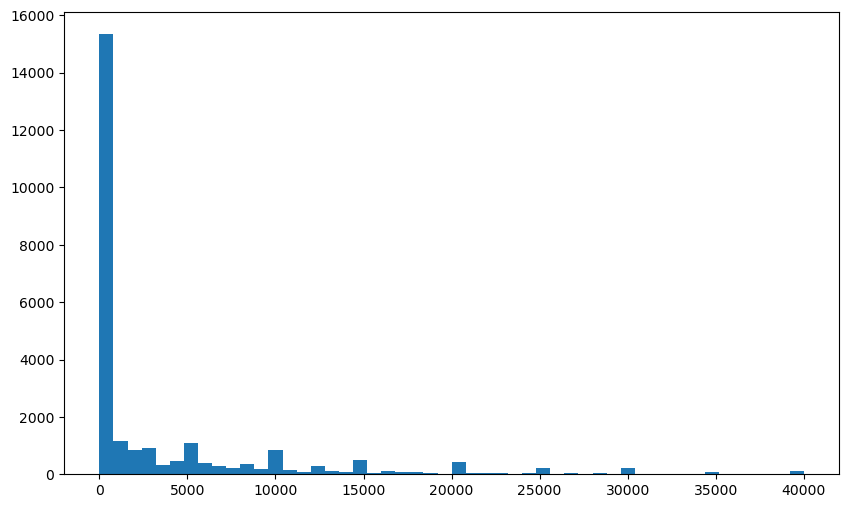

In [449]:
# show compensation distribution again - (CELL 29)
compensations = np.array(data['compensation'])
plt.hist(compensations, bins=50)
plt.show()

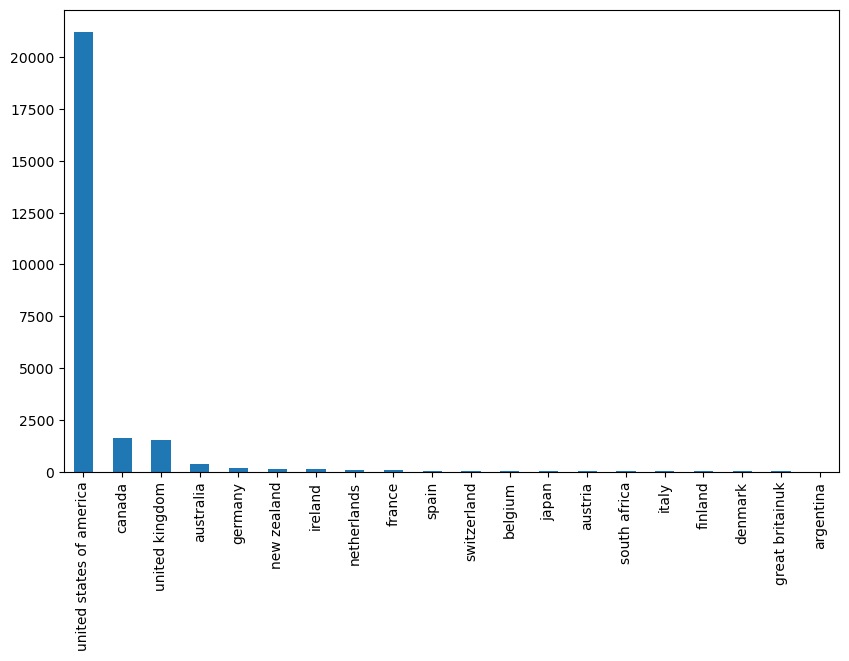

In [450]:
# show distribution of country - (CELL 30)
data['country'].value_counts().plot(kind='bar')
plt.show()

In [451]:
# create dummies for country (nominal variable) - (CELL 31)
country_dummies = pd.get_dummies(data['country'] )

In [452]:
# drop 1 dummy variable to prevent dummy variable trap (https://www.learndatasci.com/glossary/dummy-variable-trap/) - (CELL 32)
country_dummies = country_dummies.drop('germany', axis='columns')

In [453]:
# show dummies - (CELL 33)
display(country_dummies.head())

,argentina,australia,austria,belgium,canada,denmark,finland,france,great britainuk,ireland,italy,japan,netherlands,new zealand,south africa,spain,switzerland,united kingdom,united states of america
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


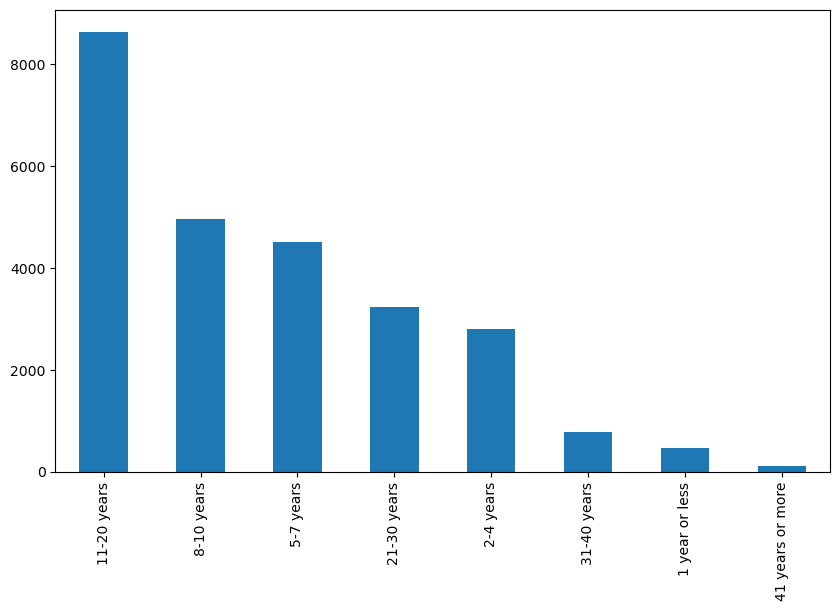

In [454]:
# show distribution of overall experience band - (CELL 34)
data['overall_experience_band'].value_counts().plot(kind='bar')
plt.show()

In [455]:
# labelencode mapping - (CELL 35)
encoded_overall_experience_band = {
    '1 year or less': 0,
    '2-4 years': 1,
    '5-7 years': 2,
    '8-10 years': 3,
    '11-20 years': 4,
    '21-30 years': 5,
    '31-40 years': 6,
    '41 years or more': 7
}

In [456]:
# labelencode overall experience band (ordinal variable) - (CELL 36)
data['overall_experience_band_le'] = data['overall_experience_band']
data['overall_experience_band_le'] = data['overall_experience_band_le'].replace(encoded_overall_experience_band)
display(data.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender,age_band_le,overall_experience_band_le
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman,2,2
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary,2,3
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman,2,1
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3


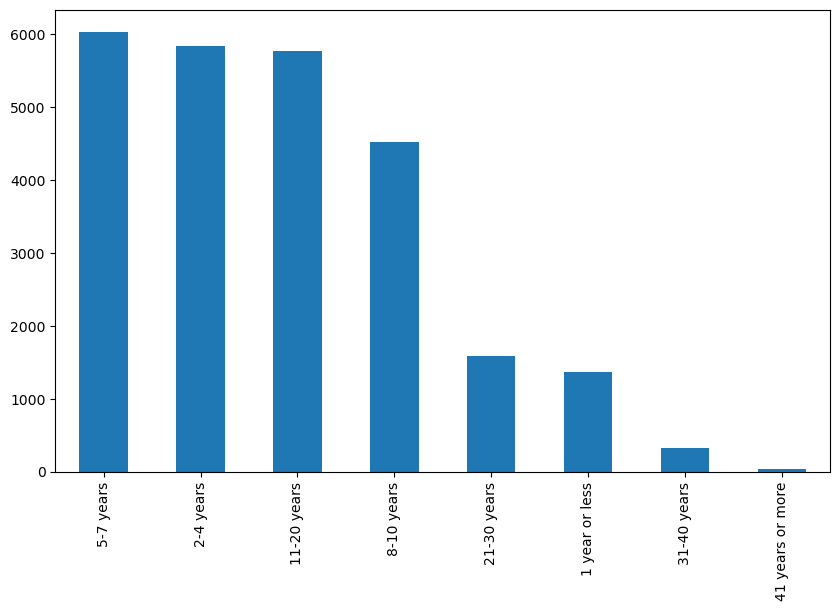

In [457]:
# show distribution of field experience band - (CELL 37)
data['field_experience_band'].value_counts().plot(kind='bar')
plt.show()

In [458]:
# labelencode mapping - (CELL 38)
encoded_field_experience_band = {
    '1 year or less': 0,
    '2-4 years': 1,
    '5-7 years': 2,
    '8-10 years': 3,
    '11-20 years': 4,
    '21-30 years': 5,
    '31-40 years': 6,
    '41 years or more': 7
}

In [459]:
# labelencode field experience band (ordinal variable) - (CELL 39)
data['field_experience_band_le'] = data['field_experience_band']
data['field_experience_band_le'] = data['field_experience_band_le'].replace(encoded_field_experience_band)
display(data.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender,age_band_le,overall_experience_band_le,field_experience_band_le
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman,2,2,2
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary,2,3,2
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman,2,1,1
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3,2
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3,2


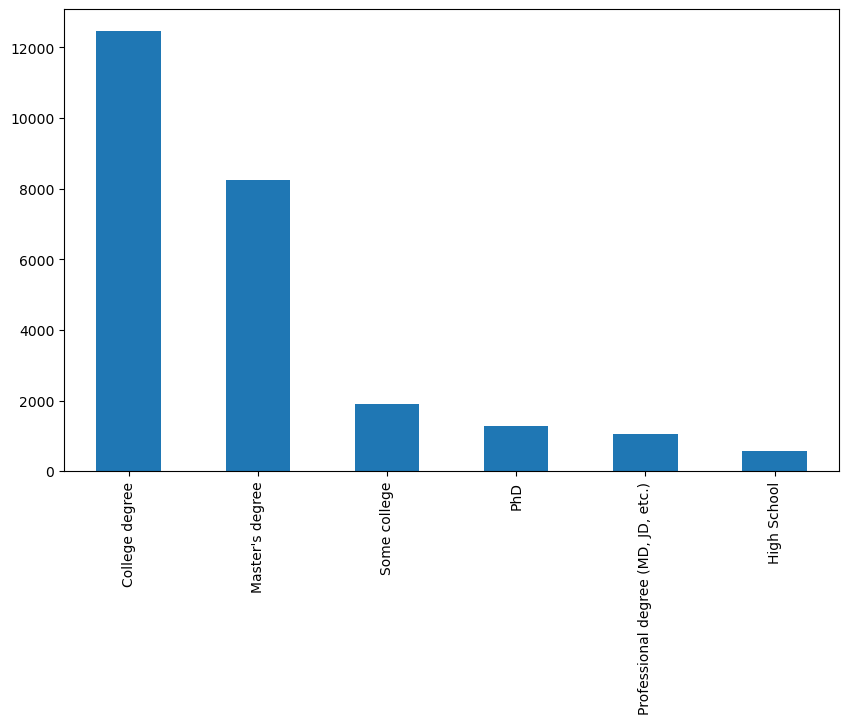

In [460]:
# show distribution of education - (CELL 40)
data['education'].value_counts().plot(kind='bar')
plt.show()

In [461]:
# labelencode mapping - (CELL 41)
encoded_education = {
    'High School': 0,
    'Some college': 1,
    'College degree': 2,
    'Professional degree (MD, JD, etc.)': 3,
    "Master's degree": 4,
    'PhD': 5,
}

In [462]:
# labelencode education (ordinal variable) - (CELL 42)
data['education_le'] = data['education']
data['education_le'] = data['education_le'].replace(encoded_education)
display(data.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender,age_band_le,overall_experience_band_le,field_experience_band_le,education_le
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman,2,2,2,4
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary,2,3,2,2
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman,2,1,1,2
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3,2,2
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman,2,3,2,2


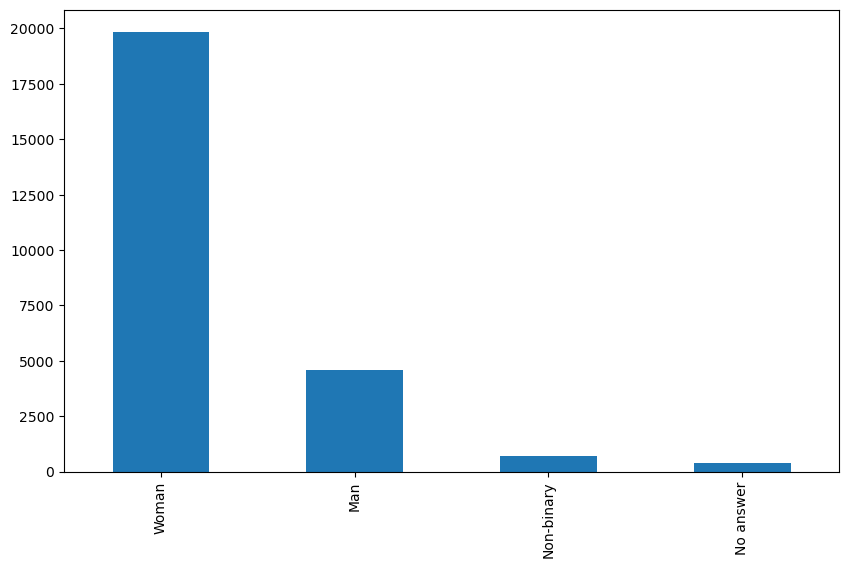

In [463]:
# show distribution of gender - (CELL 43)
data['gender'].value_counts().plot(kind='bar')
plt.show()

In [464]:
# create dummies for gender (nominal variable) - (CELL 44)
gender_dummies = pd.get_dummies(data['gender'] )

In [465]:
# drop 1 dummy variable to prevent dummy variable trap (https://www.learndatasci.com/glossary/dummy-variable-trap/) - (CELL 45)
gender_dummies = gender_dummies.drop('Man', axis='columns')

In [466]:
# show dummies - (CELL 46)
display(gender_dummies.head())

,No answer,Non-binary,Woman
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [467]:
# merge all dummies on the dataframe - (CELL 47)
data_joined = data.join(industry_dummies).join(country_dummies).join(gender_dummies)
print(data_joined.shape)

(25508, 62)


In [468]:
# show joined dataframe - (CELL 48)
display(data_joined.head())

,age_band,industry,salary,compensation,country,overall_experience_band,field_experience_band,education,gender,age_band_le,...,netherlands,new zealand,south africa,spain,switzerland,united kingdom,united states of america,No answer,Non-binary,Woman
0,25-34,Education (Higher Education),55000,0,united states of america,5-7 years,5-7 years,Master's degree,Woman,2,...,0,0,0,0,0,0,1,0,0,1
1,25-34,Computing or Tech,67158,4920,united kingdom,8-10 years,5-7 years,College degree,Non-binary,2,...,0,0,0,0,0,1,0,0,1,0
2,25-34,"Accounting, Banking & Finance",34000,0,united states of america,2-4 years,2-4 years,College degree,Woman,2,...,0,0,0,0,0,0,1,0,0,1
3,25-34,Nonprofits,62000,3000,united states of america,8-10 years,5-7 years,College degree,Woman,2,...,0,0,0,0,0,0,1,0,0,1
4,25-34,"Accounting, Banking & Finance",60000,7000,united states of america,8-10 years,5-7 years,College degree,Woman,2,...,0,0,0,0,0,0,1,0,0,1


In [469]:
# drop text columns which have been converted to dummies or labelencoding - (CELL 49)
drop_cols = ['age_band', 'industry', 'country', 'overall_experience_band', 'field_experience_band', 'education', 'gender']
data_final = data_joined.drop(drop_cols, axis='columns')
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25508 entries, 0 to 27089
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   salary                                25508 non-null  int64   
 1   compensation                          25508 non-null  int64   
 2   age_band_le                           25508 non-null  category
 3   overall_experience_band_le            25508 non-null  category
 4   field_experience_band_le              25508 non-null  category
 5   education_le                          25508 non-null  category
 6   Accounting, Banking & Finance         25508 non-null  uint8   
 7   Agriculture or Forestry               25508 non-null  uint8   
 8   Art & Design                          25508 non-null  uint8   
 9   Business or Consulting                25508 non-null  uint8   
 10  Computing or Tech                     25508 non-null  uint8   
 11  Ed

In [474]:
# show finalized transformend dataframe - (CELL 50)
display(data_final.head())
print(data_final.shape)

,salary,compensation,age_band_le,overall_experience_band_le,field_experience_band_le,education_le,"Accounting, Banking & Finance",Agriculture or Forestry,Art & Design,Business or Consulting,...,netherlands,new zealand,south africa,spain,switzerland,united kingdom,united states of america,No answer,Non-binary,Woman
0,55000,0,2,2,2,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,67158,4920,2,3,2,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,34000,0,2,1,1,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,62000,3000,2,3,2,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,60000,7000,2,3,2,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


(25508, 55)


In [475]:
# save transformend data - (CELL 51)
data_final.to_csv('Surveys_transformed.csv', index=False)

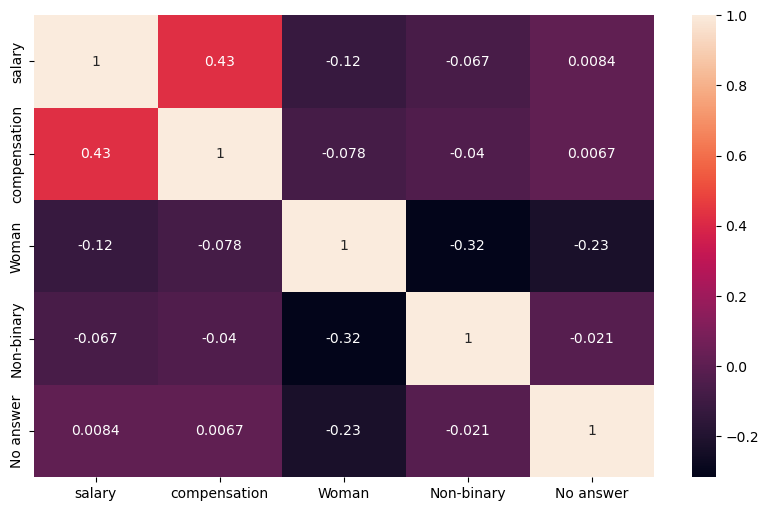

In [472]:
# check correlation between all non-labelencoded columns - (CELL 52)
corr_cols = ['salary', 'compensation', 'age_band_le', 'overall_experience_band_le', 'field_experience_band_le', \
             'Woman', 'Non-binary', 'No answer']
corr_matrix = data_final.loc[:, corr_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

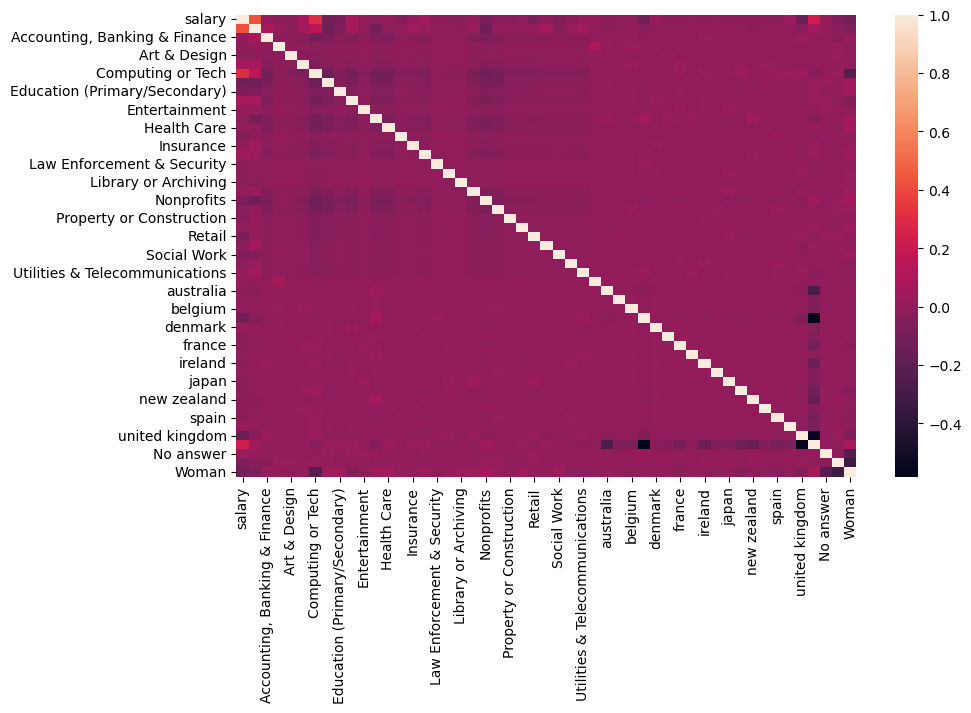

In [473]:
# check correlation between all columns - (CELL 53)
corr_matrix = data_final.corr()
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
# CELL 54

# Early hypothesis
looking at the correlations. Any predictive modeling is going to be very difficult.<br/>
There are barely any strong linear correlations between salary and the other variables.<br/>
A few strong ones, such as salary & compensation, but the overall majority are too weak.<br/>
It is expected that the machine learning models trained with this data will not deliver accurate results.<br/>